<a href="https://colab.research.google.com/github/kalpitthakkar/3DVSS_2024/blob/main/MeshCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MeshCNN:

MeshCNN is a neural network architecture specifically designed for learning directly on 3D mesh data. Unlike traditional CNNs that operate on grid-like data (such as images), MeshCNN is adapted to handle the irregular structure of 3D meshes.

## Key Components and Concepts

1. **Mesh Representation**:
    - A mesh is composed of vertices, edges, and faces (typically triangles).
    - MeshCNN primarily focuses on edges and their connectivity.

2. **Edge Convolution**:
    - The core operation of MeshCNN is edge convolution.
    - Each edge
$e_{ij}$ in a mesh connects two vertices $v_i$ and $v_j$.
    - Edge features are computed using the vertices connected by the edge and its neighboring edges.

3. **Edge Attributes**:
    - Each edge in the mesh has attributes such as length and dihedral angle.
    - These attributes are used as initial features for the edges.

4. **Pooling and Unpooling**:
    - MeshCNN includes pooling and unpooling operations adapted to the mesh structure.
    - Pooling reduces the number of edges by collapsing edges, while unpooling restores the original structure.

## Detailed Architecture

1. **Input Layer**:
    - The input to MeshCNN is a 3D mesh with vertices, edges, and faces.
    - Initial features are computed for each edge based on its geometric properties.

2. **Edge Convolutional Layers**:
    - MeshCNN performs convolution operations on edges rather than vertices or faces.
    - For each edge
$e_{ij}$, a feature vector is computed based on the edge itself and its neighboring edges.
    - The convolution operation aggregates information from adjacent edges to update the feature vector of each edge.
    - The convolution is defined as: \\
$
      \mathbf{f}_{ij}^{(l+1)} = \text{ReLU} \left( \sum_{k \in \mathcal{N}(ij)} W^{(l)} \mathbf{f}_k^{(l)} + b^{(l)} \right)
$ \\
      where
$\mathbf{f}_{ij}^{(l)}$ is the feature vector of edge $e_{ij}$ at layer $l$, $\mathcal{N}(ij)$ is the set of neighboring edges, and $W^{(l)}$ and $b^{(l)}$ are learnable weights and biases.

3. **Pooling Layers**:
    - Pooling in MeshCNN is done by collapsing edges.
    - An edge collapse operation merges two vertices connected by an edge into a single vertex, reducing the total number of edges.
    - The pooling strategy selects edges to collapse based on certain criteria, such as edge length or feature magnitude.

4. **Unpooling Layers**:
    - Unpooling is the reverse of pooling, where the mesh structure is restored to its original state.
    - Unpooling is used when upsampling is required, such as in mesh segmentation tasks.

5. **Fully Connected Layers**:
    - After several convolution and pooling layers, the network may include fully connected layers.
    - These layers are used to aggregate global features and make predictions, such as classifying the entire mesh or segmenting parts of the mesh.

6. **Output Layer**:
    - The output of MeshCNN depends on the specific task.
    - For mesh classification, the output is a set of class probabilities.
    - For mesh segmentation, the output is a label for each vertex or face.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/drive/MyDrive/3DVSS_MeshCNN
%cd /content/drive/MyDrive/3DVSS_MeshCNN
!git clone https://github.com/KUNAL-KAMALKISHOR-BHOSIKAR/MeshCNN.git


mkdir: cannot create directory ‘/content/drive/MyDrive/3DVSS_MeshCNN’: File exists
/content/drive/MyDrive/3DVSS_MeshCNN
fatal: destination path 'MeshCNN' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/3DVSS_MeshCNN/MeshCNN
!sh ./scripts/human_seg/get_data.sh


/content/drive/MyDrive/3DVSS_MeshCNN/MeshCNN
downloading the data and putting it in:  datasets
--2024-05-28 11:41:44--  https://www.dropbox.com/s/s3n05sw0zg27fz3/human_seg.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/s3n05sw0zg27fz3/human_seg.tar.gz [following]
--2024-05-28 11:41:44--  https://www.dropbox.com/s/raw/s3n05sw0zg27fz3/human_seg.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc16af23ac33a6bc9cab4d61517f.dl.dropboxusercontent.com/cd/0/inline/CTy_36Flvogbe00KcuXONuz8YOk6qE5Uyg9M-lCj1l2yEJjEsRl5NQlI38n6S41mTvazRcHtQuHsrW6WX4YEBYNzSjt9qL-WfG7fAli7nS1NDJQE6oP4HJxdIKx2xCVyNfs/file# [following]
--2024-05-28 11:41:44--  https://uc16af23ac33a6bc9cab4d61517f.dl.dropboxusercontent.com/cd/0/inline/CTy_36Flvogbe00K

In [ ]:
!sh ./scripts/human_seg/train.sh

tensorboard X not installed, visualizing wont be available
------------ Options -------------
arch: meshunet
batch_size: 12
beta1: 0.9
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: datasets/human_seg
dataset_mode: segmentation
epoch_count: 1
export_folder: 
fc_n: 100
flip_edges: 0
gpu_ids: [0]
init_gain: 0.02
init_type: normal
is_train: True
lr: 0.001
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
name: human_seg
ncf: [32, 64, 128, 256]
ninput_edges: 2280
niter: 100
niter_decay: 500
no_vis: False
norm: batch
num_aug: 20
num_groups: 16
num_threads: 3
phase: train
pool_res: [1800, 1350, 600]
print_freq: 10
resblocks: 3
run_test_freq: 1
save_epoch_freq: 1
save_latest_freq: 250
scale_verts: False
seed: None
serial_batches: False
slide_verts: 0.2
verbose_plot: False
which_epoch: latest
-------------- End ----------------
loaded mean / std from cache
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will crea

In [ ]:
!sh ./scripts/human_seg/test.sh

tensorboard X not installed, visualizing wont be available
Running Test
loaded mean / std from cache
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
loading the model from /content/drive/MyDrive/3DVSS_MeshCNN/MeshCNN/latest_net.pth
epoch: -1, TEST ACC: [88.219 %]



In [ ]:
%matplotlib inline

In [ ]:
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl
import numpy as np

In [ ]:
V = np.array
r2h = lambda x: colors.rgb2hex(tuple(map(lambda y: y / 255., x)))
surface_color = r2h((255, 230, 205))
edge_color = r2h((90, 90, 90))
edge_colors = (r2h((15, 167, 175)), r2h((230, 81, 81)), r2h((142, 105, 252)), r2h((248, 235, 57)),
               r2h((51, 159, 255)), r2h((225, 117, 231)), r2h((97, 243, 185)), r2h((161, 183, 196)))




def init_plot():
    ax = pl.figure().add_subplot(111, projection='3d')
    # hide axis, thank to
    # https://stackoverflow.com/questions/29041326/3d-plot-with-matplotlib-hide-axes-but-keep-axis-labels/
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # Get rid of the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    return (ax, [np.inf, -np.inf, np.inf, -np.inf, np.inf, -np.inf])


def update_lim(mesh, plot):
    vs = mesh[0]
    for i in range(3):
        plot[1][2 * i] = min(plot[1][2 * i], vs[:, i].min())
        plot[1][2 * i + 1] = max(plot[1][2 * i], vs[:, i].max())
    return plot


def update_plot(mesh, plot):
    if plot is None:
        plot = init_plot()
    return update_lim(mesh, plot)


def surfaces(mesh, plot):
    vs, faces, edges = mesh
    vtx = vs[faces]
    edgecolor = edge_color if not len(edges) else 'none'
    tri = a3.art3d.Poly3DCollection(vtx, facecolors=surface_color +'55', edgecolors=edgecolor,
                                    linewidths=.5, linestyles='dashdot')
    plot[0].add_collection3d(tri)
    return plot


def segments(mesh, plot):
    vs, _, edges = mesh
    for edge_c, edge_group in enumerate(edges):
        for edge_idx in edge_group:
            edge = vs[edge_idx]
            line = a3.art3d.Line3DCollection([edge],  linewidths=.5, linestyles='dashdot')
            line.set_color(edge_colors[edge_c % len(edge_colors)])
            plot[0].add_collection3d(line)
    return plot


def plot_mesh(mesh, *whats, show=True, plot=None):
    for what in [update_plot] + list(whats):
        plot = what(mesh, plot)
    if show:
        li = max(plot[1][1], plot[1][3], plot[1][5])
        plot[0].auto_scale_xyz([0, li], [0, li], [0, li])
        pl.tight_layout()
        pl.show()
    return plot


def parse_obje(obj_file, scale_by):
    vs = []
    faces = []
    edges = []

    def add_to_edges():
        if edge_c >= len(edges):
            for _ in range(len(edges), edge_c + 1):
                edges.append([])
        edges[edge_c].append(edge_v)

    def fix_vertices():
        nonlocal vs, scale_by
        vs = V(vs)
        z = vs[:, 2].copy()
        vs[:, 2] = vs[:, 1]
        vs[:, 1] = z
        max_range = 0
        for i in range(3):
            min_value = np.min(vs[:, i])
            max_value = np.max(vs[:, i])
            max_range = max(max_range, max_value - min_value)
            vs[:, i] -= min_value
        if not scale_by:
            scale_by = max_range
        vs /= scale_by

    with open(obj_file) as f:
        for line in f:
            line = line.strip()
            splitted_line = line.split()
            if not splitted_line:
                continue
            elif splitted_line[0] == 'v':
                vs.append([float(v) for v in splitted_line[1:]])
            elif splitted_line[0] == 'f':
                faces.append([int(c) - 1 for c in splitted_line[1:]])
            elif splitted_line[0] == 'e':
                if len(splitted_line) >= 4:
                    edge_v = [int(c) - 1 for c in splitted_line[1:-1]]
                    edge_c = int(splitted_line[-1])
                    add_to_edges()

    vs = V(vs)
    fix_vertices()
    faces = V(faces, dtype=int)
    edges = [V(c, dtype=int) for c in edges]
    return (vs, faces, edges), scale_by


def view_meshes(*files, offset=.2):
    plot = None
    max_x = 0
    scale = 0
    for file in files:
        mesh, scale = parse_obje(file, scale)
        max_x_current = mesh[0][:, 0].max()
        mesh[0][:, 0] += max_x + offset
        plot = plot_mesh(mesh, surfaces, segments, plot=plot, show=file == files[-1])
        max_x += max_x_current + offset

<ipython-input-10-f0443d2cb355>:15: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-10-f0443d2cb355>:16: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-10-f0443d2cb355>:17: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-10-f0443d2cb355>:19: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
<ipython-input-10-f0443d2cb355>:20: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and wil

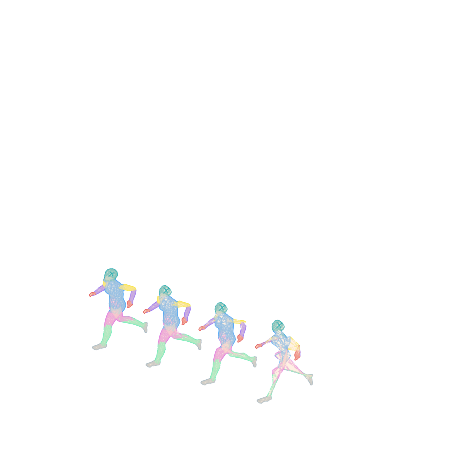

In [ ]:
files = [
         'checkpoints/human_seg/meshes/shrec__4_0.obj',
         'checkpoints/human_seg/meshes/shrec__4_1.obj',
         'checkpoints/human_seg/meshes/shrec__4_2.obj',
         'checkpoints/human_seg/meshes/shrec__4_3.obj',
        #  'checkpoints/human_seg/meshes/shrec__12_0.obj',
]

view_meshes(*files)

# Play with Mesh

In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
# Import necessary libraries
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [ ]:
# Function to plot the mesh using matplotlib
def plot_mesh(mesh, title="Mesh"):
    triangles = np.asarray(mesh.triangles)
    vertices = np.asarray(mesh.vertices)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.add_collection3d(Poly3DCollection(vertices[triangles], alpha=.25, linewidths=0.1, edgecolors='k'))

    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=1)
    ax.set_title(title)
    plt.show()

In [ ]:
# Generate a simple mesh: a sphere
mesh = o3d.geometry.TriangleMesh.create_sphere(radius=1.0)
mesh.compute_vertex_normals()

TriangleMesh with 762 points and 1520 triangles.

Original mesh:


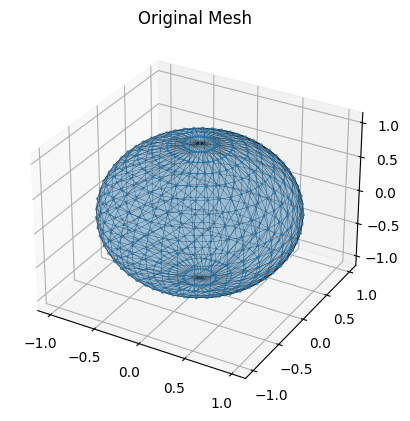

In [ ]:
# Visualize the original mesh
print("Original mesh:")
plot_mesh(mesh, title="Original Mesh")

In [ ]:
# Perform mesh reduction (decimation)
target_number_of_triangles = len(mesh.triangles) // 4
dec_mesh = mesh.simplify_quadric_decimation(target_number_of_triangles)

In [ ]:
# Compute vertex normals for the reduced mesh
dec_mesh.compute_vertex_normals()

TriangleMesh with 192 points and 380 triangles.

Reduced mesh:


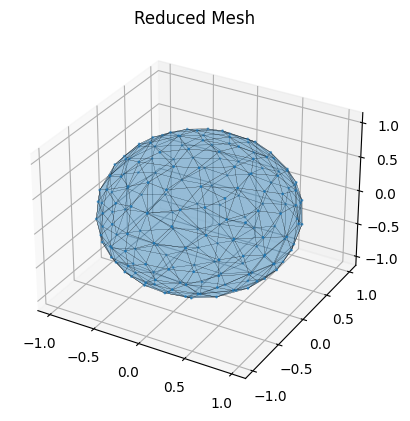

In [ ]:
# Visualize the reduced mesh
print("Reduced mesh:")
plot_mesh(dec_mesh, title="Reduced Mesh")

In [ ]:
# Additional functionality: converting the mesh to a point cloud for visualization
pcd = dec_mesh.sample_points_uniformly(number_of_points=1000)

In [ ]:
# Function to plot the point cloud using matplotlib
def plot_point_cloud(pcd, title="Point Cloud"):
    points = np.asarray(pcd.points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)
    ax.set_title(title)
    plt.show()

Point cloud sampled from reduced mesh:


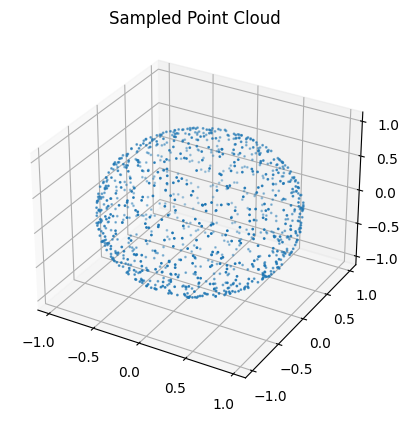

In [ ]:
# Visualize the point cloud
print("Point cloud sampled from reduced mesh:")
plot_point_cloud(pcd, title="Sampled Point Cloud")